In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Load Data
temp_file = 'Resources/temp_data.csv'
rainfall_file = 'Resources/rainfall_data.csv'
temp_data = pd.read_csv(temp_file, error_bad_lines=False)
rainfall_data = pd.read_csv(rainfall_file, error_bad_lines=False)
happy_2015 = pd.read_csv('Resources/2015.csv')
happy_2016 = pd.read_csv('Resources/2016.csv')
happy_2017 = pd.read_csv('Resources/2017.csv')
happy_2018 = pd.read_csv('Resources/2018.csv')
happy_2019 = pd.read_csv('Resources/2019.csv')

In [3]:
#Clean & Merge weather data
#drop na values
temp_data = temp_data.dropna()
rainfall_data = rainfall_data.dropna()

#merge rainfall into temp dataframe
combined_weather_df = pd.merge(temp_data, rainfall_data, how="outer")

#add Degrees F Column
combined_weather_df["Temperature - F"] = combined_weather_df["Temperature - (Celsius)"]*9/5 + 32

#group by country & year
combined_data_groupby = combined_weather_df.groupby(["Country", "Year"],as_index=False)

#temp_data_groupby.head(10)
weather_df = combined_data_groupby.mean()
weather_df

,Country,Year,Temperature - (Celsius),Rainfall - (MM),Temperature - F
0,Afghanistan,1991,12.894488,36.287492,55.210078
1,Afghanistan,1992,12.544548,34.013019,54.580186
2,Afghanistan,1993,12.977138,26.423775,55.358849
3,Afghanistan,1994,13.080018,28.518532,55.544033
4,Afghanistan,1995,13.040895,25.074846,55.473611
...,...,...,...,...,...
5065,Zimbabwe,2012,21.910075,45.312368,71.438135
5066,Zimbabwe,2013,21.624350,51.234424,70.923830
5067,Zimbabwe,2014,21.710483,50.608135,71.078870
5068,Zimbabwe,2015,22.327625,32.552881,72.189725


In [4]:
#Clean & merge happiness data
#Add year column
happy_2015["Year"] = 2015
happy_2016["Year"] = 2016
happy_2017["Year"] = 2017
happy_2018["Year"] = 2018
happy_2019["Year"] = 2019

#Rename columns (Country, Happiness Rank, Happiness Score, Year)
happy_2017 = happy_2017.rename(columns={
    "Happiness.Rank":"Happiness Rank",
    "Happiness.Score":"Happiness Score"
})
happy_2018 = happy_2018.rename(columns={
    "Overall rank":"Happiness Rank",
    "Score":"Happiness Score",
    "Country or region":"Country"
})

happy_2019 = happy_2019.rename(columns={
    "Overall rank":"Happiness Rank",
    "Score":"Happiness Score",
    "Country or region":"Country"
})

happy_2015_clean = happy_2015[["Year","Country","Happiness Rank","Happiness Score"]]
happy_2016_clean = happy_2016[["Year","Country","Happiness Rank","Happiness Score"]]
happy_2017_clean = happy_2017[["Year","Country","Happiness Rank","Happiness Score"]]
happy_2018_clean = happy_2018[["Year","Country","Happiness Rank","Happiness Score"]]
happy_2019_clean = happy_2019[["Year","Country","Happiness Rank","Happiness Score"]]

#Merge datasets
combined_happy_df = pd.concat([happy_2015_clean, happy_2016_clean, happy_2017_clean, happy_2018_clean, happy_2019_clean], ignore_index=True)

happy_groupby = combined_happy_df.groupby(["Country", "Year"])
happy_groupby.mean()


Happiness Rank  Happiness Score
Country     Year                                 
Afghanistan 2015             153            3.575
            2016             154            3.360
            2017             141            3.794
            2018             145            3.632
            2019             154            3.203
...                          ...              ...
Zimbabwe    2015             115            4.610
            2016             131            4.193
            2017             138            3.875
            2018             144            3.692
            2019             146            3.663

[782 rows x 2 columns]

In [20]:
# weather_df["Country"] = weather_df["Country"].astype(str)
# weather_df["Year"] = weather_df["Year"].astype(int)
# combined_happy_df["Country"] = combined_happy_df["Country"].astype(str)
# combined_happy_df["Year"] = combined_happy_df["Year"].astype(int)

weather_df["Country"] = weather_df["Country"].str.strip()
merge = pd.merge(weather_df, combined_happy_df, on=["Country","Year"], how="right")
merge = merge.dropna()
merge.head(50)

,Country,Year,Temperature - (Celsius),Rainfall - (MM),Temperature - F,Happiness Rank,Happiness Score
0,Afghanistan,2015,13.866922,33.449854,56.960459,153,3.575
1,Afghanistan,2016,14.513565,28.248094,58.124417,154,3.360
2,Albania,2015,12.685259,78.137235,54.833466,95,4.959
3,Albania,2016,12.722338,91.312021,54.900207,109,4.655
4,Algeria,2015,23.656875,6.511808,74.582375,68,5.605
5,Algeria,2016,24.067067,5.449698,75.320720,38,6.355
6,Angola,2015,22.260433,75.087551,72.068780,137,4.033
7,Angola,2016,22.555908,80.413907,72.600635,141,3.866
8,Argentina,2015,14.962130,51.424467,58.931834,30,6.574
9,Argentina,2016,14.506255,51.719258,58.111259,26,6.650


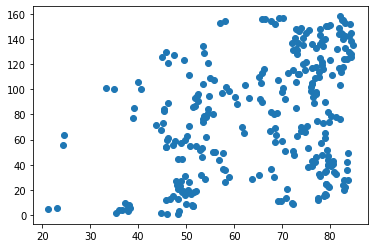

In [21]:
plt.scatter(merge["Temperature - F"],merge["Happiness Rank"])

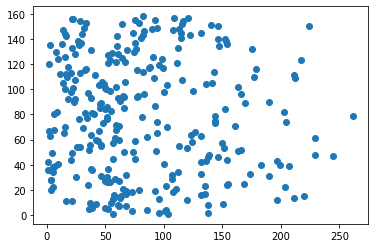

In [22]:
plt.scatter(merge["Rainfall - (MM)"],merge["Happiness Rank"])

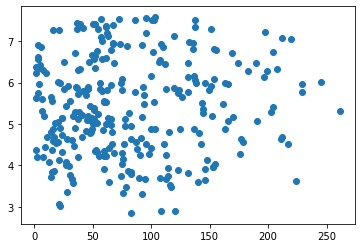

In [23]:
plt.scatter(merge["Rainfall - (MM)"],merge["Happiness Score"])

In [24]:
merge.groupby(["Country"]).mean()

,Year,Temperature - (Celsius),Rainfall - (MM),Temperature - F,Happiness Rank,Happiness Score
Country,,,,,,
Afghanistan,2015.5,14.190243,30.848974,57.542438,153.5,3.4675
Albania,2015.5,12.703798,84.724628,54.866837,102.0,4.8070
Algeria,2015.5,23.861971,5.980753,74.951548,53.0,5.9800
Angola,2015.5,22.408171,77.750729,72.334708,139.0,3.9495
Argentina,2015.5,14.734192,51.571862,58.521547,28.0,6.6120
...,...,...,...,...,...,...
Venezuela,2015.5,26.458188,144.571217,79.624738,33.5,6.4470
Vietnam,2015.5,25.105083,154.850942,77.189150,85.5,5.2105
Yemen,2015.5,24.379412,13.649371,75.882942,141.5,3.9005
